In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

f = open('gpt3.json','r')
dataset = json.load(f)
f.close()

mapping = {
    "major_inaccurate": 1,
    "minor_inaccurate": 0.5,
    "accurate": 0
}

scores = []

print(dataset)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(dataset)

238

In [ ]:
dataset[0]['annotation']

['major_inaccurate',
 'major_inaccurate',
 'major_inaccurate',
 'major_inaccurate',
 'major_inaccurate',
 'major_inaccurate',
 'major_inaccurate',
 'major_inaccurate',
 'major_inaccurate']

In [ ]:
for data in dataset:
    numerical_data = [mapping[item] for item in data['annotation']]
    scores.append(sum(numerical_data) / len(numerical_data))

print(len(scores))

238


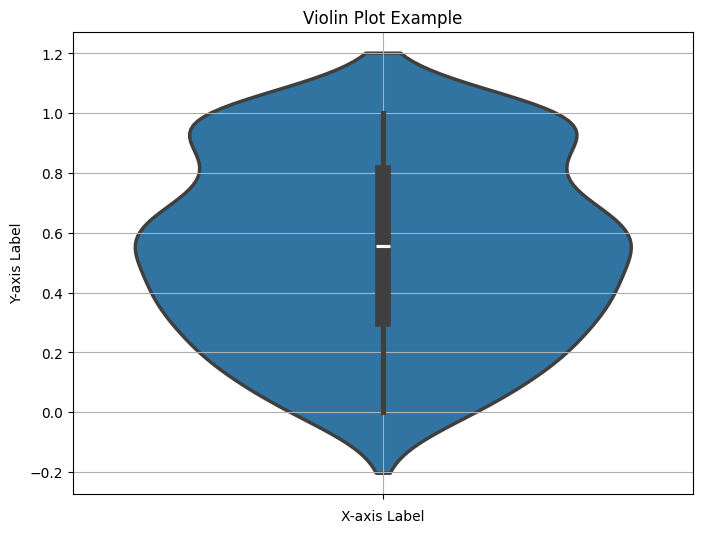

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=scores, linewidth=2.5)
plt.title('Violin Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid(True)
plt.show()

In [ ]:
f = open('gpt3_bertscores.json','r')
bert = json.load(f)
f.close()

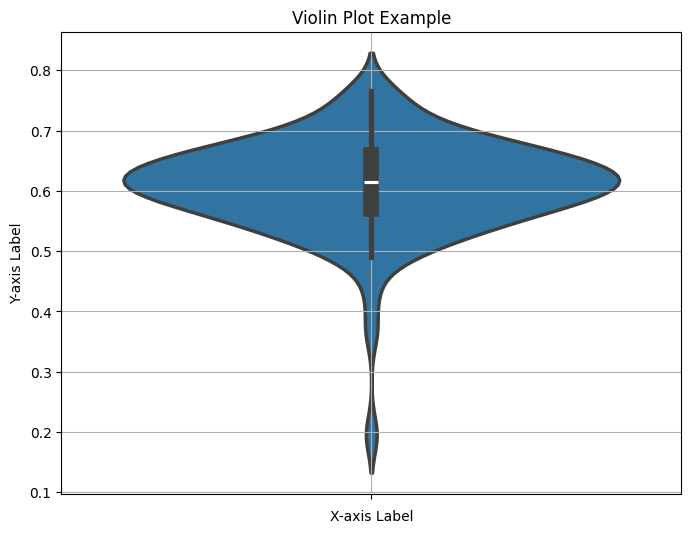

In [ ]:
bert_scores = []
for b in bert['bertscore']:
  bert_scores.append(sum(b) / len(b))

plt.figure(figsize=(8, 6))
sns.violinplot(data=bert_scores, linewidth=2.5)
plt.title('Violin Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid(True)
plt.show()

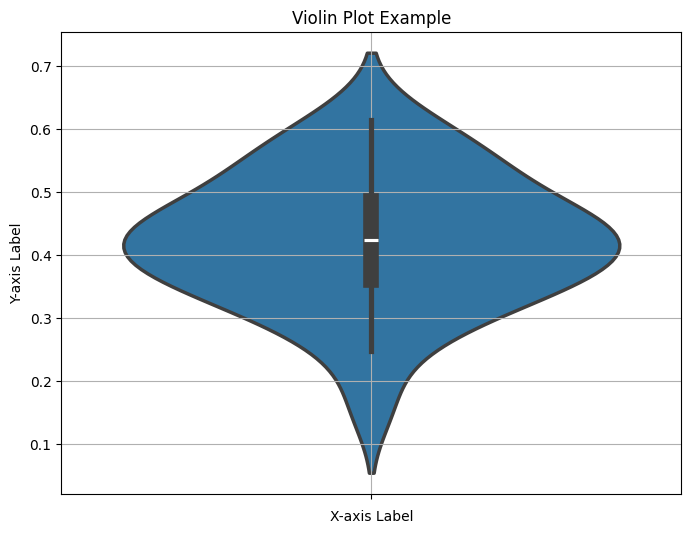

In [ ]:
f = open('gpt3_mqag_scores.json','r')
bert = json.load(f)
f.close()

mqag_scores = []
for b in bert['mqag']:
  mqag_scores.append(sum(b) / len(b))

plt.figure(figsize=(8, 6))
sns.violinplot(data=mqag_scores, linewidth=2.5)
plt.title('Violin Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid(True)
plt.show()

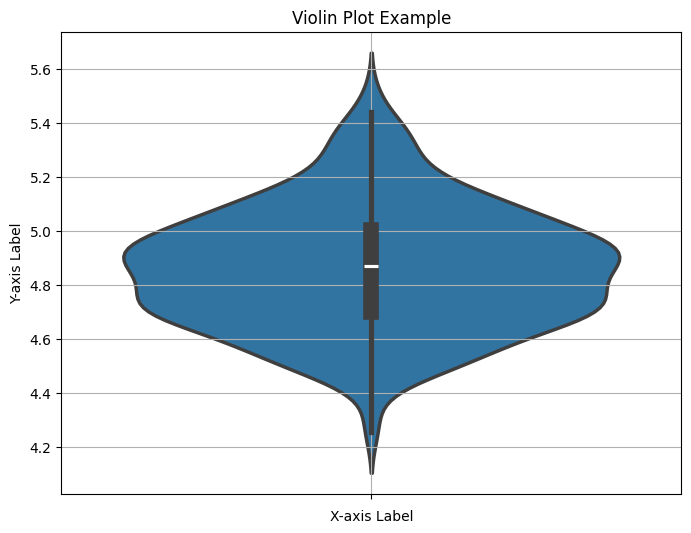

In [ ]:
f = open('gpt3_ngram_scores.json','r')
bert = json.load(f)
f.close()

ngram_scores = []
for b in bert['ngram']:
  ngram_scores.append(b['doc_level']['avg_neg_logprob'])

plt.figure(figsize=(8, 6))
sns.violinplot(data=ngram_scores, linewidth=2.5)
plt.title('Violin Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid(True)
plt.show()

In [ ]:
bert['ngram'][0].keys()

dict_keys(['sent_level', 'doc_level'])

In [ ]:
min_value = min(ngram_scores)
max_value = max(ngram_scores)

# Apply min-max scaling
scaled_data = [(value - min_value) / (max_value - min_value) for value in ngram_scores]


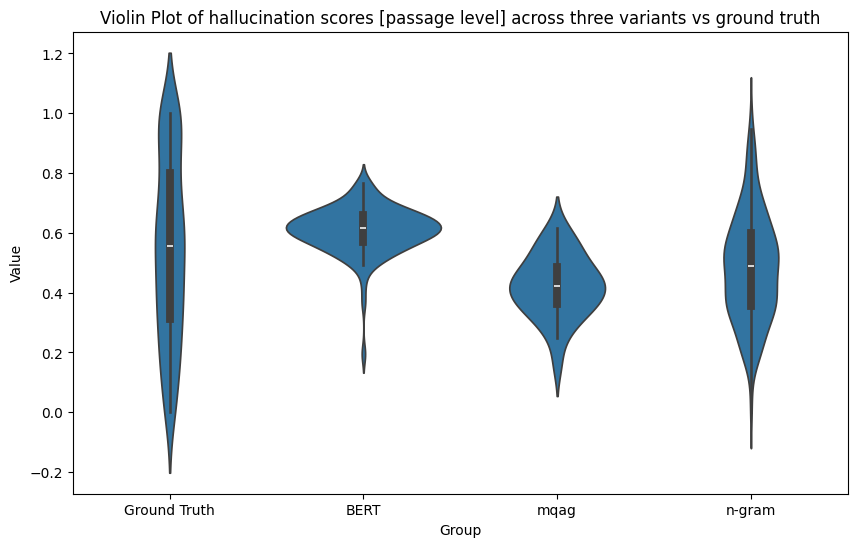

In [ ]:
combined_data = [(value, 'Ground Truth') for value in scores] + [(value, 'BERT') for value in bert_scores] + [(value, 'mqag') for value in mqag_scores] + [(value, 'n-gram') for value in scaled_data]

# Create a DataFrame from the combined data
import pandas as pd
df = pd.DataFrame(combined_data, columns=['Value', 'Group'])

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Value', data=df)
plt.title('Violin Plot of hallucination scores [passage level] across three variants vs ground truth')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

In [ ]:
min(scores)

0.0

In [ ]:
max(scores)

1.0

for n-gram

In [ ]:
from scipy.stats import spearmanr, pearsonr



# Compute Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(scores[:100], ngram_scores[:100])

# Compute Pearson correlation coefficient
pearson_corr, pearson_p_value = pearsonr(scores[:100], ngram_scores[:100])

print("Spearman correlation coefficient:", spearman_corr)
print("Spearman p-value:", spearman_p_value)
print("Pearson correlation coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p_value)


Spearman correlation coefficient: 0.3154400688636118
Spearman p-value: 0.0013897448336455474
Pearson correlation coefficient: 0.32732712233808964
Pearson p-value: 0.0008867535311363065


mqag

In [ ]:
from scipy.stats import spearmanr, pearsonr



# Compute Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(scores[:30], mqag_scores)

# Compute Pearson correlation coefficient
pearson_corr, pearson_p_value = pearsonr(scores[:30], mqag_scores)

print("Spearman correlation coefficient:", spearman_corr)
print("Spearman p-value:", spearman_p_value)
print("Pearson correlation coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p_value)

Spearman correlation coefficient: -0.09553506634198974
Spearman p-value: 0.6155381806018085
Pearson correlation coefficient: -0.08255742694832549
Pearson p-value: 0.66449665810731


bert

In [ ]:
from scipy.stats import spearmanr, pearsonr



# Compute Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(scores[:100], bert_scores)

# Compute Pearson correlation coefficient
pearson_corr, pearson_p_value = pearsonr(scores[:100], bert_scores)

print("Spearman correlation coefficient:", spearman_corr)
print("Spearman p-value:", spearman_p_value)
print("Pearson correlation coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p_value)

Spearman correlation coefficient: 0.4077978622723837
Spearman p-value: 2.5391612735933845e-05
Pearson correlation coefficient: 0.4833918417169148
Pearson p-value: 3.5003488468172123e-07
